In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange
from tqdm.notebook import tqdm
from scipy.signal import correlate
import os

from isingpackage import*

%matplotlib inline

In [5]:
#the auto covariance function
#return a list of A(tau) for tau in range(len(M_list))
def autocov(M_list_eq):
    M_list_eq = np.array(M_list_eq)
    M_prime = M_list_eq - M_list_eq.mean()
    A = []
    for i in range(len(M_list_eq)):
        n = len(M_list_eq) - i
        A_i = np.multiply(M_prime[:n], M_prime[i:]).sum()/n
        A.append(A_i)
    return A 

#autocorrelation time
def autocor(M_list_eq):
    A = autocov(M_list_eq)
    return A/A[0]

#decorrelation time
def dec_time(M_list_eq):
    threshold = 1/np.e

    dec_time = -1

    cor = autocor(M_list_eq)

    #search
    for i in range(len(cor)):
        if cor[i] < threshold:
            dec_time = i
            break
    
    if dec_time == -1:
        raise NameError('dec_time not found')
    else:
        return dec_time

Text(0.5, 0, 'Time frame (monte-carlo steps per site)')

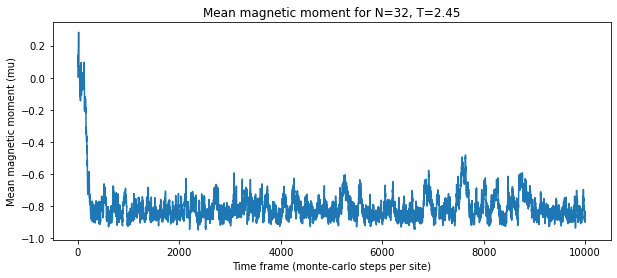

In [8]:
test = hex_series.load_txt('data32_10k\\N=032_T=215_muH=000_frames=10000_0.txt')

M_list = np.array(test.get_M_list())/(32**2)

fig, ax = plt.subplots(figsize=(10,4))

ax.plot(M_list)
ax.set_title('Mean magnetic moment for N=32, T=2.45')
ax.set_ylabel('Mean magnetic moment (mu)')
ax.set_xlabel('Time frame (monte-carlo steps per site)')

23


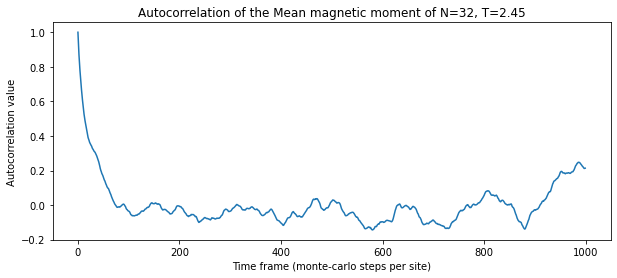

In [12]:
fig, ax = plt.subplots(figsize=(10,4))

M_list_eq = M_list[2000:6000]

cor = autocor(M_list_eq)

ax.plot(cor[:1000])

ax.set_title('Autocorrelation of the Mean magnetic moment of N=32, T=2.45')
ax.set_ylabel('Autocorrelation value')
ax.set_xlabel('Time frame (monte-carlo steps per site)')

print(dec_time(M_list_eq))

In [57]:
#reading in all the series generated in a given path
#carry out the measurements and save the values into a csv file
path = 'data10_10k\\'

filenames = os.listdir(path)

string = ''

T=-1

for file_name in tqdm(filenames):
    
    data = hex_series.load_txt(path+file_name)

    if data.T != T:
        #new temperature, new line
        string += '\n'
        T = data.T
        string += '{}, '.format(T)

    M_list = data.get_M_list()
    
    dt = dec_time(M_list[2000:])

    #saving the measurements as a string with comma seperated
    string = string + str(dt) + ', '

  0%|          | 0/46 [00:00<?, ?it/s]

In [58]:
#saving the csv
with open('measurements\\deccorelation_time_10_10k.csv', 'w') as f:
    f.write(string)